In [ ]:
!pip install --upgrade tensorflow

In [ ]:
pip install matplotlib==3.1.0

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

 90% 89.0M/98.8M [00:03<00:00, 29.4MB/s]
100% 98.8M/98.8M [00:03<00:00, 30.7MB/s]


In [ ]:
!unzip heartbeat.zip -d heartbeat

Archive:  heartbeat.zip
  inflating: heartbeat/mitbih_test.csv  
  inflating: heartbeat/mitbih_train.csv  
  inflating: heartbeat/ptbdb_abnormal.csv  
  inflating: heartbeat/ptbdb_normal.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ls /content/gdrive/My\ Drive

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('heartbeat/mitbih_train.csv')
test = pd.read_csv('heartbeat/mitbih_test.csv')
print(train.shape)
print(test.shape)

(87553, 188)
(21891, 188)


In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

Y = np.array(train.iloc[:, 187].values).astype(np.int8)
X = np.array(train.iloc[:, list(range(187))].values)[..., np.newaxis]
#print(train.iloc[:, -1])

In [ ]:
input = keras.layers.Input(shape = (187, 1))
layer_input = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1)(input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(layer_input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
layer = keras.layers.Add()([layer, layer_input])
layer = keras.layers.Activation("relu")(layer)
layer_input = keras.layers.MaxPooling1D(pool_size=5, strides=2)(layer)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(layer_input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
layer = keras.layers.Add()([layer, layer_input])
layer = keras.layers.Activation("relu")(layer)
layer_input = keras.layers.MaxPooling1D(pool_size=5, strides=2)(layer)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(layer_input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
layer = keras.layers.Add()([layer, layer_input])
layer = keras.layers.Activation("relu")(layer)
layer_input = keras.layers.MaxPooling1D(pool_size=5, strides=2)(layer)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(layer_input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
layer = keras.layers.Add()([layer, layer_input])
layer = keras.layers.Activation("relu")(layer)
layer_input = keras.layers.MaxPooling1D(pool_size=5, strides=2)(layer)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(layer_input)
layer = keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation=None)(layer )
layer = keras.layers.Add()([layer, layer_input])
layer = keras.layers.Activation("relu")(layer)
layer = keras.layers.MaxPooling1D(pool_size=5, strides=2)(layer)
layer = keras.layers.Flatten()(layer)
layer = keras.layers.Dense(32, activation='relu')(layer)
output = keras.layers.Dense(5, activation='softmax')(layer)
model = keras.models.Model(inputs = [input], outputs = [output])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
history = model.fit(X, Y, epochs = 60, callbacks=[early_stopping_cb], validation_split = 0.1)
#model.save("cnn1D.h5")

Train on 78797 samples, validate on 8756 samples
Epoch 1/60
78797/78797 [==============================] - 124s 2ms/sample - loss: 0.1606 - accuracy: 0.9549 - val_loss: 0.1074 - val_accuracy: 0.9690
Epoch 2/60
78797/78797 [==============================] - 121s 2ms/sample - loss: 0.0833 - accuracy: 0.9766 - val_loss: 0.0767 - val_accuracy: 0.9777
Epoch 3/60
78797/78797 [==============================] - 119s 2ms/sample - loss: 0.0697 - accuracy: 0.9797 - val_loss: 0.0765 - val_accuracy: 0.9790
Epoch 4/60
78797/78797 [==============================] - 119s 2ms/sample - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0482 - val_accuracy: 0.9862
Epoch 5/60
78797/78797 [==============================] - 118s 2ms/sample - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0558 - val_accuracy: 0.9841
Epoch 6/60
78797/78797 [==============================] - 118s 1ms/sample - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0443 - val_accuracy: 0.9864
Epoch 7/60
78797/78797 [===========================

In [ ]:
Y_test = np.array(test.iloc[:, 187].values).astype(np.int8)
X_test = np.array(test.iloc[:, list(range(187))].values)[..., np.newaxis]

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
pred_test = np.argmax(pred_test, axis=-1)

In [ ]:
f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9344534871152902 
Test accuracy score : 0.9904286546434731 


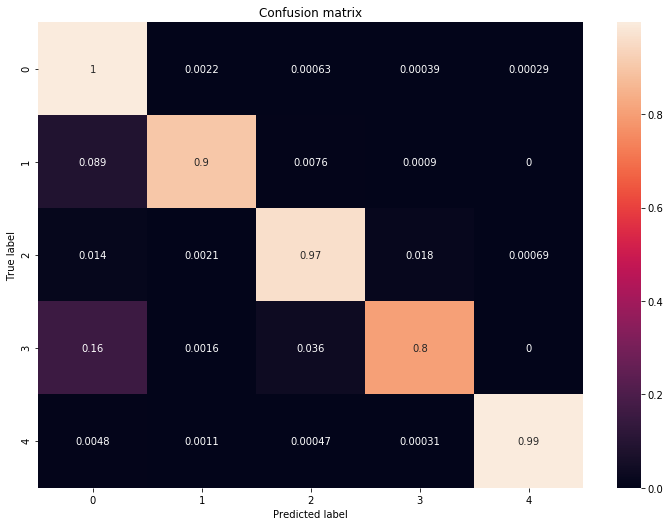

In [ ]:
cm = confusion_matrix(Y_test, pred_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,7))
#sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 10})
#plt.show()
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#cm = confusion_matrix(Y_test, pred_test, normalize = 'pred')
#print(cm)
#plt.figure(figsize = (10,7))
#sns.heatmap(cm, annot=True,annot_kws={"size": 10})
#plt.tight_layout()
#plt.show()

In [ ]:
model.save("/content/gdrive/My Drive/My_CNN1D_model.h5")

In [ ]:
model2 = keras.models.load_model("/content/gdrive/My Drive/My_CNN1D_model.h5")